# M3.1 - Regression Concepts

In [1]:
import os
import numpy as np
import pandas as pd
np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import datasets


pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings("ignore")

PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)
        
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from pprint import pprint

#This is a little recursive helper function converts all nested ndarrays to python list of lists so that pretty printer knows what to do.

def arrayToList(arr):
    if type(arr) == type(np.array):
        #If the passed type is an ndarray then convert it to a list and
        #recursively convert all nested types
        return arrayToList(arr.tolist())
    else:
        #if item isn't an ndarray leave it as is.
        return arr

#suppress exponential notation, define an appropriate float formatter
#specify stdout line width and let pretty print do the work
np.set_printoptions(suppress=True, formatter={'float_kind':'{:16.5f}'.format}, linewidth=120)

## <font color = 'green'>3.1.1 Review of Basic Statistics:</font>
### 3.1.1.1. Expectation Value:
Let $\mathbf{x}$ be a continuous random variable with range $[a; b]$ and probability density function $f(x)$. The expected value of $\mathbf{x}$ is defined by:

$
\mathbf{E}(\mathbf{x}) = \sum\limits_{i=1}^{m}{\mathbf{p}(\mathbf{x}_i).\mathbf{x}_i} \hspace{2cm}- \text{for Discrete x.}\\
\mathbf{E}(\mathbf{x}) = \int_a^b{x.f(x).dx} \hspace{2cm}- \text{for Continuous x.}
$

### 3.1.1.2. Variance:
Let $\mathbf{x}$ be a random variable with mean $\mu$.The variance of $\mathbf{x}$ is defined by:

$
Var(\mathbf{x}) = \mathbf{E}{((\mathbf{x} - \mu)^2)} = \sum\limits_{i=1}^{m}{\mathbf{p}(\mathbf{x}_i).{(\mathbf{x}_i} - \mu)^2} = \mathbf{E}{(\mathbf{x}^2)} - \mathbf{E}(\mathbf{x})^2
$

### 3.1.1.3. Standard Deviation:
The standard deviation $\boldsymbol{\sigma}$ of $\mathbf{x}$ is defined by:

$
\boldsymbol{\sigma} = \sqrt{Var(\mathbf{x})} = \sqrt{\sum\limits_{i=1}^{m}{\mathbf{p}(\mathbf{x}_i).{(\mathbf{x}_i} - \mu)^2}}
$

### 3.1.1.4. Covariance:
Covariance is a measure of how much two random variables vary together. Suppose X and Y are random variables with means $\mu_{\mathbf{x}}$ and $\mu_{\mathbf{y}}$ . The covariance of X and Y is defined as:

$
Cov(X,Y) = \mathbf{E}{((X - \mu_{\mathbf{x}})(Y - \mu_{\mathbf{y}}))}
$

Since covariance is defined as an expected value we compute it in the usual way as a sum or integral.

<b>Discrete Case:</b> If X and Y have joint pmf $\mathbf{p}(x_i,y_j)$, then:

$
Cov(X,Y) = \mathbf{E}{((X - \mu_{\mathbf{x}})(Y - \mu_{\mathbf{y}}))} = \sum\limits_{i=1}^{n} \sum\limits_{j=1}^{m}{\mathbf{p}(x_i,y_j).{(x_i - \mu_{\mathbf{x}})(y_j - \mu_{\mathbf{y}})}} = [\sum\limits_{i=1}^{n} \sum\limits_{j=1}^{m}{\mathbf{p}(x_i,y_j).x_i.y_j}] - \mu_{\mathbf{x}}.\mu_{\mathbf{y}}
$

<b>Continuous Case:</b> If X and Y have joint pdf $f(x,y)$, then:

$
Cov(X,Y) = \mathbf{E}{((X - \mu_{\mathbf{x}})(Y - \mu_{\mathbf{y}}))} = \int_a^b \int_c^d{(x - \mu_{\mathbf{x}})(y - \mu_{\mathbf{y}}).f(x,y).dxdy} = [\int_a^b \int_c^d{xy.f(x,y).dxdy}] - \mu_x.\mu_y 
$

### 3.1.1.5. Correlation:
The units of covariance $Cov(X,Y)$ are 'units of X times units of Y'. This makes it hard to compare covariances: if we change scales, then the covariance changes as well. Correlation is a way to remove the scale from the covariance.

 - <b>Definition:</b> 
 The correlation coefficient between X and Y is defined by:
 
 $
 Cor(X,Y) = \rho_{\mathbf{x}\mathbf{y}} = \frac{Cov(X,Y)}{\sigma_{\mathbf{x}}\sigma_{\mathbf{y}}}
 $

## <font color = 'green'>3.1.2. Loading an Example Dataset for Regression Analysis</font>

In [2]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston.DESCR[:1523])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['target'] = boston.target
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
data_num = data.drop(['CHAS', 'RAD'], axis = 1)
# sns.pairplot(data_num, diag_kind = 'kde')
# save_fig("M3_Boston_pairplot")
# plt.clf()

In [7]:
Image(filename='img/M3_Boston_pairplot.png')

## <font color = 'green'>3.1.3 Measuring Correlation:</font>

In [8]:
def covariance(variable_1, variable_2, bias=0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2)))/(observations-min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1,var2,bias=0):
    return covariance(standardize(var1), standardize(var2), bias)

In [9]:
from scipy.stats.stats import pearsonr

calculated_correlation = correlation(data['RM'], data['target'])
pearson_correlation = pearsonr(data['RM'], data['target'])

print (f'Our correlation estimation: {calculated_correlation: 4f}.') 
print (f'Correlation from Scipy pearsonr estimation: {pearson_correlation[0]: 4f}.')

Our correlation estimation:  0.695360.
Correlation from Scipy pearsonr estimation:  0.695360.


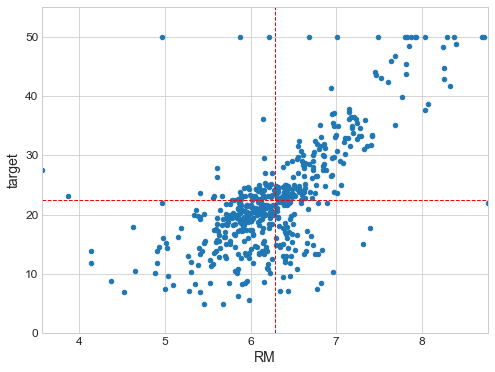

In [10]:
x_range = [data['RM'].min(),data['RM'].max()]
y_range = [data['target'].min()-5,data['target'].max()+5]

scatter_plot = data.plot(kind='scatter', x='RM', y='target',xlim=x_range, ylim=y_range, figsize = (8, 6))
meanY = scatter_plot.plot(x_range, [data['target'].mean(), data['target'].mean()], '--' , color='red', linewidth=1)
meanX = scatter_plot.plot([data['RM'].mean(),data['RM'].mean()], y_range, '--', color='red', linewidth=1)

## <font color = 'green'>3.1.4. Statistical Modeling - Linear Models</font>

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
from scipy import stats

In [12]:
y = data['target']
X = data['RM']
X = sm.add_constant(X)

linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           2.49e-74
Time:                        11:59:09   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)
print (fitted_model.params)

const   -34.670621
RM        9.102109
dtype: float64


In [14]:
data_1d = data[['RM', 'target']]
data_1d['predicted'] = fitted_values
data_1d.head()

RM  target  predicted
0  6.575    24.0  25.175746
1  6.421    21.6  23.774021
2  7.185    34.7  30.728032
3  6.998    33.4  29.025938
4  7.147    36.2  30.382152

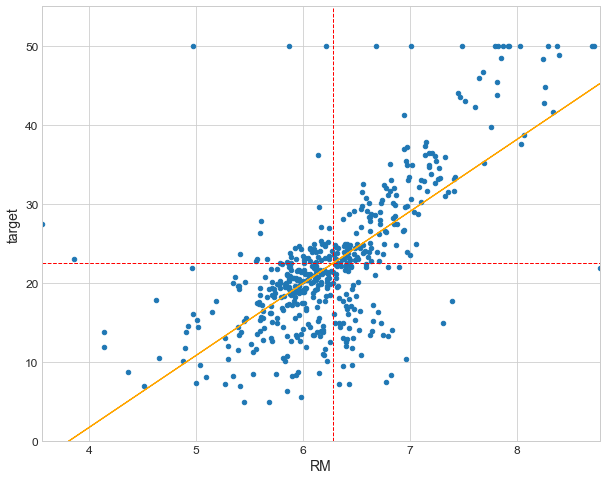

In [15]:
x_range = [data['RM'].min(),data['RM'].max()]
y_range = [data['target'].min() - 5, data['target'].max() + 5]

scatter_plot = data.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range, figsize = (10, 8))

meanY = scatter_plot.plot(x_range, [data['target'].mean(), data['target'].mean()], '--', color='red', linewidth=1)
meanX =scatter_plot.plot([data['RM'].mean(), data['RM'].mean()], y_range, '--', color='red', linewidth=1)

regression_line = scatter_plot.plot(data['RM'], fitted_values, '-', color='orange', linewidth=1.2)

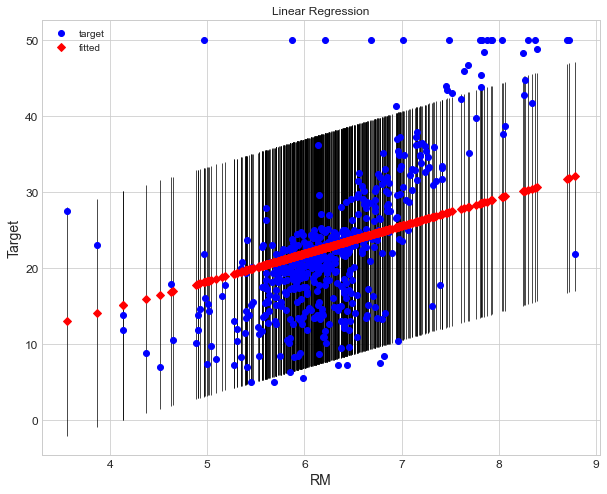

In [16]:
model = smf.ols("target ~ -1 + RM", data=data)
result = model.fit()

fig, ax = plt.subplots(figsize = (10, 8))
smg.plot_fit(result, 0, ax = ax)
ax.set_ylabel("Target")
ax.set_xlabel("RM")
ax.set_title("Linear Regression")

plt.show()